In [1]:
import pandas as pd
game_info=pd.read_csv('C:\\Users\\ishik\\Downloads\\appstore_games (2).csv')
game_info.head(5)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [2]:
#copying the data of game_info to games_info
games_info=game_info

In [3]:
#dropping unwanted columns
games_info=games_info.drop(columns="URL")
games_info=games_info.drop(columns="Icon URL")

In [4]:
#specifying the name of columns
games_info.columns= ['ID', 'Name','Subtitle','User_Rating','User_Rating_Count','Price','In_App_Purchase','Desc','Dev','Age_Rating','Languages','Size','Primary_Genre','Genre','Release_Date','Current_Version_date']

In [5]:
#dropping the games that has no user rating
games_info=games_info[pd.notnull(games_info['User_Rating'])]

#dropping the games which has low user count
Low_User_Count=games_info[games_info.User_Rating_Count < (games_info['User_Rating_Count'].max())*0.0001].index
games_info.drop(Low_User_Count, inplace=True)

In [6]:
games_info.describe()

,ID,User_Rating,User_Rating_Count,Price,Size
count,1.901000e+03,1901.000000,1.901000e+03,1901.000000,1.901000e+03
mean,8.462137e+08,4.268806,1.299563e+04,0.705171,2.181117e+08
std,3.659308e+08,0.530462,8.367556e+04,3.608167,3.510415e+08
min,2.849214e+08,1.500000,3.040000e+02,0.000000,2.158400e+05
25%,4.977292e+08,4.000000,6.390000e+02,0.000000,5.478707e+07
50%,8.833143e+08,4.500000,1.547000e+03,0.000000,1.271071e+08
75%,1.155324e+09,4.500000,5.561000e+03,0.000000,2.394952e+08
max,1.466987e+09,5.000000,3.032734e+06,139.990000,3.916692e+09


In [7]:
games_info['Size1'] = round(games_info['Size']/1000000,1)

In [8]:
games_info.describe()

,ID,User_Rating,User_Rating_Count,Price,Size,Size1
count,1.901000e+03,1901.000000,1.901000e+03,1901.000000,1.901000e+03,1901.000000
mean,8.462137e+08,4.268806,1.299563e+04,0.705171,2.181117e+08,218.110836
std,3.659308e+08,0.530462,8.367556e+04,3.608167,3.510415e+08,351.041634
min,2.849214e+08,1.500000,3.040000e+02,0.000000,2.158400e+05,0.200000
25%,4.977292e+08,4.000000,6.390000e+02,0.000000,5.478707e+07,54.800000
50%,8.833143e+08,4.500000,1.547000e+03,0.000000,1.271071e+08,127.100000
75%,1.155324e+09,4.500000,5.561000e+03,0.000000,2.394952e+08,239.500000
max,1.466987e+09,5.000000,3.032734e+06,139.990000,3.916692e+09,3916.700000


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

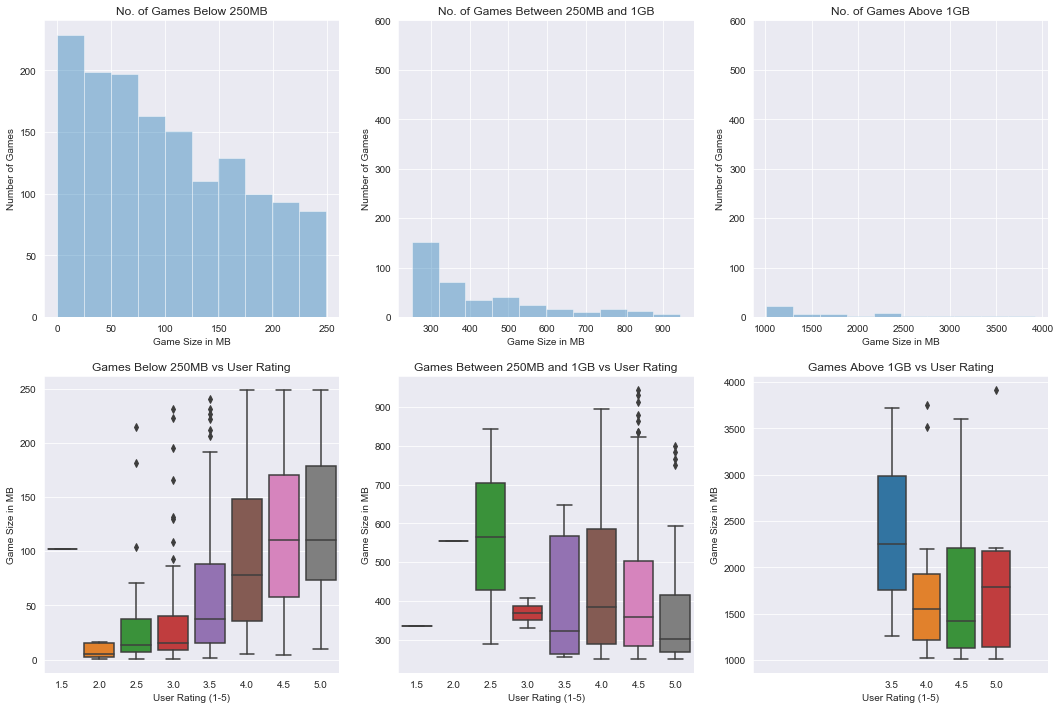

In [10]:
# comparing game size with user rating
Size_Less_250MB = games_info[games_info.Size1 <250]
Size_More_250MB = games_info[(games_info.Size1 >=250) & (games_info.Size1 <1000)]
Size_More_1GB = games_info[games_info.Size1 >=1000]


sns.set_style('darkgrid')
f, axes = plt.subplots (2,3, figsize=(18,12))



vis1 = sns.boxplot( data = Size_Less_250MB, x = 'User_Rating', y = 'Size1',  ax=axes[1,0])
vis2 = sns.boxplot( data = Size_More_250MB, x = 'User_Rating', y = 'Size1', ax=axes[1,1])
vis3 = sns.boxplot( data = Size_More_1GB, x = 'User_Rating', y = 'Size1', ax=axes[1,2],)
vis4 = sns.distplot(Size_Less_250MB.Size1, bins= 10, kde=False,ax=axes[0,0])
vis5 = sns.distplot(Size_More_250MB.Size1, bins= 10, kde=False,ax=axes[0,1])
vis6 = sns.distplot(Size_More_1GB.Size1, bins= 10, kde=False,ax=axes[0,2])

vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis2.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis3.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis4.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis5.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis6.set(xlabel='Game Size in MB',ylabel='Number of Games')

axes[0, 0].set_title('No. of Games Below 250MB')
axes[0, 1].set_title('No. of Games Between 250MB and 1GB')
axes[0, 2].set_title('No. of Games Above 1GB')
axes[1, 0].set_title('Games Below 250MB vs User Rating')
axes[1, 1].set_title('Games Between 250MB and 1GB vs User Rating')
axes[1, 2].set_title('Games Above 1GB vs User Rating')
vis3.set(xlim=(-4, 4.5))

vis5.set(ylim=(0, 600))
vis6.set(ylim=(0, 600))

plt.ioff()

##### Inference
1. after visualizing these graphs we can conclude that most of the games are below (250 MB),and to have user rating 4 and above
   need to be 100 MB and above
2. from second graph,we conclude that games between 250MB and 1GB having user rating 4 are between 300MB and 600MB.
3. from third graph, we comclude that very small no. of games are above 1GB.Games between 1.7GB and 2.4 GB have rating equal to    and grater than 4

In [11]:
games= games_info.copy()

In [12]:
#deleting games,entertainment and stratergy genre as it is almost present in everyone
games['Genre'] = games['Genre'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 
games['Genre'] = games['Genre'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
games['Genre']=games['Genre'].str.strip()

In [13]:
#these are the unique game genres
games.Genre.unique()

array(['Puzzle', 'Board', '', 'Action', 'Simulation', 'Card',
       'Finance Simulation', 'Playing Role', 'Sports', 'Adventure',
       'Board Education', 'Word', 'Family', 'Casual', 'Travel Word',
       'Casino', 'Education Puzzle', 'Sports Sports', 'Board Business',
       'Family Travel', 'Navigation Playing Role', 'Adventure Reference',
       'Lifestyle Simulation', 'Board Lifestyle', 'Adventure Medical',
       'Simulation Utilities', 'Trivia', 'Family Networking Social',
       'Education Simulation', 'Playing Reference Role',
       'Board Networking Social', 'Family Lifestyle', 'Action Music',
       '& Family Fitness Health', 'Music Music', 'Lifestyle Playing Role',
       'Board Travel', 'Education', 'Adventure Utilities',
       'Adventure Lifestyle', 'Adventure Sports',
       'Networking Playing Role Social', 'Networking Simulation Social',
       'Education Family', 'Education Trivia', 'Lifestyle Puzzle',
       'Action News', 'Utilities', 'Music', 'Casual Lifestyle',


In [14]:
games.Genre.value_counts()#identifying the genres which occur frequently

Simulation                  376
Action                      351
Playing Role                272
Puzzle                      213
Board                       155
                           ... 
Navigation Trivia             1
Casual Education              1
Travel Word                   1
Adventure Books               1
Casual Networking Social      1
Name: Genre, Length: 77, dtype: int64

In [15]:
#deleting the genres which are not main
#keeping only puzzle,action,family,education,adventure,board,role and simulation
Not_main=games[~games.Genre.str.contains('Puzzle') & \
                           ~games.Genre.str.contains('Action') & \
                           ~games.Genre.str.contains('Family')& \
                           ~games.Genre.str.contains('Education')& \
                           ~games.Genre.str.contains('Adventure')&\
                           ~games.Genre.str.contains('Board')&\
                           ~games.Genre.str.contains('Role')&\
                           ~games.Genre.str.contains('Simulation')].index
games.drop(Not_main , inplace=True)

In [16]:
games.Genre.unique()

array(['Puzzle', 'Board', 'Action', 'Simulation', 'Finance Simulation',
       'Playing Role', 'Adventure', 'Board Education', 'Family',
       'Education Puzzle', 'Board Business', 'Family Travel',
       'Navigation Playing Role', 'Adventure Reference',
       'Lifestyle Simulation', 'Board Lifestyle', 'Adventure Medical',
       'Simulation Utilities', 'Family Networking Social',
       'Education Simulation', 'Playing Reference Role',
       'Board Networking Social', 'Family Lifestyle', 'Action Music',
       '& Family Fitness Health', 'Lifestyle Playing Role',
       'Board Travel', 'Education', 'Adventure Utilities',
       'Adventure Lifestyle', 'Adventure Sports',
       'Networking Playing Role Social', 'Networking Simulation Social',
       'Education Family', 'Education Trivia', 'Lifestyle Puzzle',
       'Action News', 'Card Education', '& Fitness Health Puzzle',
       'Simulation Sports', 'Adventure Books', 'Board Sports',
       '& Fitness Health Playing Role', 'Action 

In [17]:
#grouping the puzzle and board game under puzzle
#grouping the action game under action
#grouping the role and adventure game under adventure
#grouping the family and education game under family
#grouping the simulation game under simulation
games.loc[games['Genre'].str.contains('Puzzle'),'Genre'] = 'Puzzle'
games.loc[games['Genre'].str.contains('Board'),'Genre'] = 'Puzzle'
games.loc[games['Genre'].str.contains('Action'),'Genre'] = 'Action'
games.loc[games['Genre'].str.contains('Adventure'),'Genre'] = 'Adventure'
games.loc[games['Genre'].str.contains('Role'),'Genre'] = 'Adventure'
games.loc[games['Genre'].str.contains('Family'),'Genre'] = 'Family'
games.loc[games['Genre'].str.contains('Education'),'Genre'] = 'Family'
games.loc[games['Genre'].str.contains('Simulation'),'Genre'] = 'Simulation'

In [18]:
#now these are the unique genres
games.Genre.unique()

array(['Puzzle', 'Action', 'Simulation', 'Adventure', 'Family'],
      dtype=object)

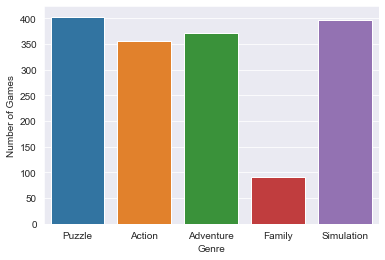

In [19]:
#identifying the no. of games w.r.t different genres
x=['Puzzle','Action','Adventure','Family','Simulation']
y = [games.Genre[(games['Genre']=='Puzzle')].count(),games.Genre[(games['Genre']=='Action')].count(),\
     games.Genre[(games['Genre']=='Adventure')].count(),games.Genre[(games['Genre']=='Family')].count(),\
    games.Genre[(games['Genre']=='Simulation')].count()]

vis1= sns.barplot(x,y)
vis1.set(xlabel='Genre',ylabel='Number of Games')
plt.ioff()


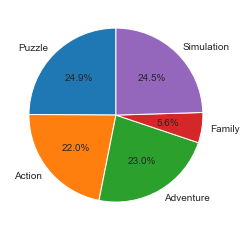

In [20]:
#creating a pie plot so that exact pecentage can be find out
a=['Puzzle','Action','Adventure','Family','Simulation']
b = [games.Genre[(games['Genre']=='Puzzle')].count(),games.Genre[(games['Genre']=='Action')].count(),\
     games.Genre[(games['Genre']=='Adventure')].count(),games.Genre[(games['Genre']=='Family')].count(),\
    games.Genre[(games['Genre']=='Simulation')].count()]
plt.pie(b, labels=a, startangle=90, autopct='%.1f%%')
plt.show()

##### Inference
1. From this we can infer that puzzle > simulation > adventure > action > family

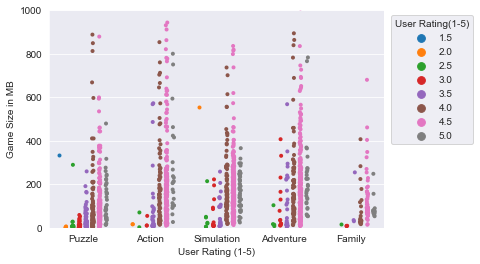

In [21]:
#creating a stripplot to compare game size and user rating(grouped by genre)
vis1= sns.stripplot(y='Size1' , x='Genre', data=games,\
                hue='User_Rating',dodge=True, size=4)

plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.28, 1))

vis1.set(ylim=(0, 1000))
vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
plt.ioff()

##### Inference
1. From this we infer that games having(User_Rating>=4) are less than 400MB.
2. Puzzle,Action and Simulation are less saturated above 400MB.
3. Family games has less competiotion overall.
4. Adventure games are an exception which stills get good rating upto 600MB.

In [22]:
games_info.describe()

,ID,User_Rating,User_Rating_Count,Price,Size,Size1
count,1.901000e+03,1901.000000,1.901000e+03,1901.000000,1.901000e+03,1901.000000
mean,8.462137e+08,4.268806,1.299563e+04,0.705171,2.181117e+08,218.110836
std,3.659308e+08,0.530462,8.367556e+04,3.608167,3.510415e+08,351.041634
min,2.849214e+08,1.500000,3.040000e+02,0.000000,2.158400e+05,0.200000
25%,4.977292e+08,4.000000,6.390000e+02,0.000000,5.478707e+07,54.800000
50%,8.833143e+08,4.500000,1.547000e+03,0.000000,1.271071e+08,127.100000
75%,1.155324e+09,4.500000,5.561000e+03,0.000000,2.394952e+08,239.500000
max,1.466987e+09,5.000000,3.032734e+06,139.990000,3.916692e+09,3916.700000


In [23]:
games_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901 entries, 0 to 16724
Data columns (total 17 columns):
ID                      1901 non-null int64
Name                    1901 non-null object
Subtitle                946 non-null object
User_Rating             1901 non-null float64
User_Rating_Count       1901 non-null float64
Price                   1901 non-null float64
In_App_Purchase         1467 non-null object
Desc                    1901 non-null object
Dev                     1901 non-null object
Age_Rating              1901 non-null object
Languages               1896 non-null object
Size                    1901 non-null float64
Primary_Genre           1901 non-null object
Genre                   1901 non-null object
Release_Date            1901 non-null object
Current_Version_date    1901 non-null object
Size1                   1901 non-null float64
dtypes: float64(5), int64(1), object(11)
memory usage: 267.3+ KB


In [24]:
#comparing on price factor

Text(0.5, 1.0, 'User Rating Vs Price')

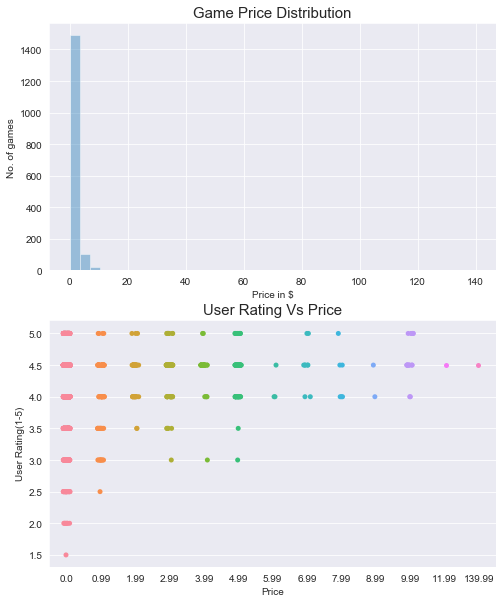

In [25]:
h,axes=plt.subplots(2,1,figsize=(8,10))

vis1=sns.distplot(games.Price,kde=False,ax=axes[0])
vis2 = sns.stripplot( data = games, y = 'User_Rating', x = 'Price',  ax=axes[1])

vis1.set(xlabel="Price in $",ylabel="No. of games")
vis2.set(xlabel="Price",ylabel="User Rating(1-5)")

axes[0].set_title("Game Price Distribution", fontsize=15)
axes[1].set_title("User Rating Vs Price", fontsize=15)

##### Inference
1. Majority of the game have a price less than 0.99
2. We can infer that the games above 6.99 always have a User_Rating of 4 and above.

In [26]:
high_price=games_info[games_info.Price>20].index
games_info.drop(high_price, inplace=True)

In [27]:
games1=games.copy()

In [28]:
import statistics

In [29]:
games1['In_App_Purchase'] = games1['In_App_Purchase'].str.replace(',', '') 
games1.In_App_Purchase=games1.In_App_Purchase.fillna(0)


In [30]:
for i in (list(games1.index.values)):
    if games1.In_App_Purchase[i] ==0:
        games1['In_App_Purchase'][i]=0.01
    elif games1.In_App_Purchase[i] !=0:
        j=str.split(games1.In_App_Purchase[i])
        j=[float(i) for i in j]
        games1['In_App_Purchase'][i]=statistics.mean(j)

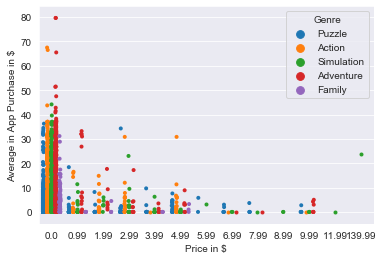

In [31]:
vis1= sns.stripplot(y=games1.In_App_Purchase , x=games1.Price, data=games1, hue=games1.Genre, dodge=True, size=4 )

vis1.set(xlabel='Price in $',ylabel='Average in App Purchase in $')
plt.ioff()

##### Inference
1. almost 90% of the companies focuses on games less than 0.99 and and high in app purchase.


In [32]:
#Date released/updated factor
games['Year'] = games['Release_Date']

In [33]:
for i in (list(games.index.values)):
    games['Year'][i]=games['Year'][i][-4:]

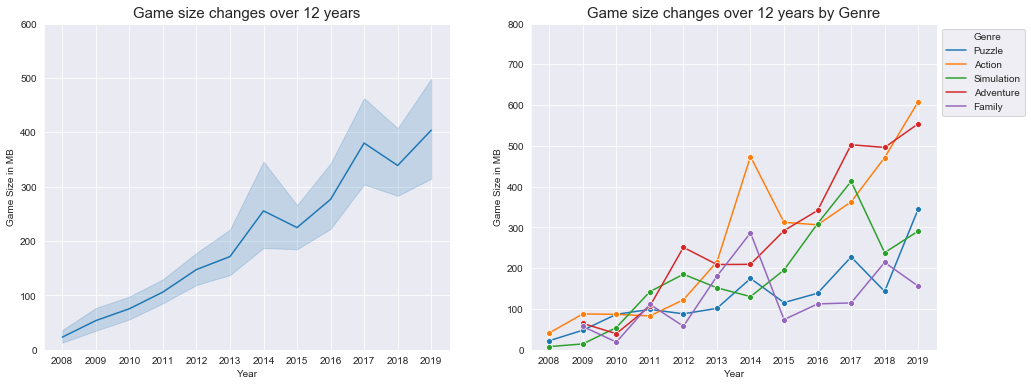

In [34]:
g, axes = plt.subplots (1,2, figsize=(16,6))

graph1 = sns.lineplot(x=games.Year, y=games.Size1, data=games, ax=axes[0])
graph1.set(ylim=(0, 600))
graph2 = sns.lineplot(x=games.Year, y=games.Size1, hue=games.Genre, err_style=None, marker='o',ax=axes[1])
graph2.set(ylim=(0, 800))
plt.legend(bbox_to_anchor=(1, 1))

axes[0].set_title('Game size changes over 12 years',fontsize=15)
axes[1].set_title('Game size changes over 12 years by Genre',fontsize=15)

graph1.set(xlabel='Year',ylabel='Game Size in MB')
graph2.set(xlabel='Year',ylabel='Game Size in MB')

plt.ioff()

##### Inference
1. From the left graph we can see a almost Linear increase of game size except a sudden spike from 2013-2014. 
2. The right graph shows the growth of game size per game Genre.Game size are increasing roughly 50MB per year with Action/Adventure/Simulation games takes up bigger size and Family/Puzzle less size

In [35]:
#Age Rating factor
games1.Age_Rating.unique()

array(['4+', '9+', '12+', '17+'], dtype=object)

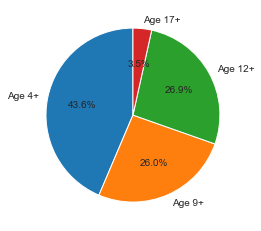

In [36]:
pieplot = [games1.Age_Rating[(games1['Age_Rating']=='4+')].count(),games1.Age_Rating[(games1['Age_Rating']=='9+')].count(),\
     games1.Age_Rating[(games1['Age_Rating']=='12+')].count(),games1.Age_Rating[(games1['Age_Rating']=='17+')].count()]
label = ['Age 4+','Age 9+','Age 12+','Age 17+']

plt.pie(pieplot, labels=label, startangle=90, autopct='%.1f%%')
plt.show()

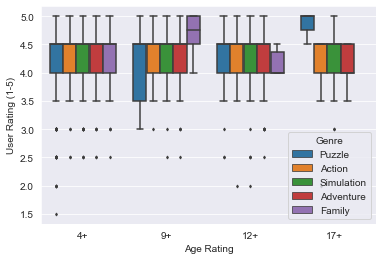

In [37]:
graph1 = sns.boxplot(x=games1.Age_Rating, y=games.User_Rating, data=games, hue=games.Genre, dodge=True, fliersize=2)

graph1.set(xlabel='Age Rating',ylabel='User Rating (1-5)')

plt.ioff()

##### Inference
Consumers enjoy more matured content i.e games targetted for 17+ age and above